Assessment 1: Financial Analysis

In [2]:
import pandas as pd

data = pd.read_csv("D:/python_practice/finance_economics_dataset.csv")

df = pd.DataFrame(data)
#print(df)

print(df.head(5))

print(df.isnull().sum())

         Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0  2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
1  2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2  2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
3  2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
4  2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

   Trading Volume  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0         2670411           -0.37                6.06                   6.10   
1       690220415            3.19                4.95                   6.62   
2       315284661            5.54                9.13                   2.60   
3        13098297           10.00                3.77                   2.20   
4       385306746            1.53                2.20                   8.20   

   ...  Forex USD/EUR  Forex USD/JPY  Crude Oil Price (U

In [2]:
#1. What is the shape of the dataset?
print(df.shape)

(3000, 24)


In [3]:
#2. What are the column names and their data types?
print(df.dtypes)

Date                                      object
Stock Index                               object
Open Price                               float64
Close Price                              float64
Daily High                               float64
Daily Low                                float64
Trading Volume                             int64
GDP Growth (%)                           float64
Inflation Rate (%)                       float64
Unemployment Rate (%)                    float64
Interest Rate (%)                        float64
Consumer Confidence Index                  int64
Government Debt (Billion USD)              int64
Corporate Profits (Billion USD)            int64
Forex USD/EUR                            float64
Forex USD/JPY                            float64
Crude Oil Price (USD per Barrel)         float64
Gold Price (USD per Ounce)               float64
Real Estate Index                        float64
Retail Sales (Billion USD)                 int64
Bankruptcy Rate (%) 

In [4]:
#3. How many unique stock indices are there?
if 'Stock Index' in df.columns:
    print("\n3. Unique Stock Indices:", df['Stock Index'].nunique())


3. Unique Stock Indices: 3


In [ ]:
#4. What is the date range of the dataset?
"""if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    print("\n4. Date Range:", df['Date'].min(), "to", df['Date'].max())"""


4. Date Range: 2000-01-01 00:00:00 to 2008-03-18 00:00:00


In [21]:
print("\n4. Date Range:", df['Date'].min(), "to", df['Date'].max())


4. Date Range: 2000-01-01 00:00:00 to 2008-03-18 00:00:00


In [11]:
#5. Are there any missing values?

print(df.isnull().sum())

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

In [18]:
#6. Are there negative values in columns that should be non-negative?

non_negative_cols = ['Trading Volume', 'Gold Price', 'Crude Oil Price', 'GDP Growth %']
for col in non_negative_cols:
    if col in df.columns:
        negatives = (df[col] < 0).sum()
        print(f"\n6. Negative values in {col}: {negatives}")


6. Negative values in Trading Volume: 0


In [3]:
#7. What is the summary of GDP Growth (%)?
if 'GDP Growth %' in df.columns:
    print("\n7. GDP Growth Summary:\n", df['GDP Growth %'].describe())


In [30]:
#8. Are there rows with zero or near-zero trading volume?
if 'Trading Volume' in df.columns:
    near_zero = df[df['Trading Volume'] <= 1]
    print("\n8. Rows with zero/near-zero Trading Volume:", near_zero.shape[0])


8. Rows with zero/near-zero Trading Volume: 0


In [15]:
#9. Are there any duplicate rows?

print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [8]:
#10. Are there outliers in GDP, Gold, or Oil prices?
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

for col in ['GDP Growth (%)', 'Gold Price', 'Crude Oil Price']:
    if col in df.columns:
        print(f"\n10. Outliers in {col}:", detect_outliers(df[col].dropna()))



10. Outliers in GDP Growth (%): 0


In [10]:
##11. What is the summary of Inflation Rate (%)?
print("\n11. Inflation Rate Summary:\n", df['Inflation Rate (%)'].describe())


11. Inflation Rate Summary:
 count    3000.000000
mean        5.096830
std         2.910513
min         0.010000
25%         2.607500
50%         5.110000
75%         7.600000
max        10.000000
Name: Inflation Rate (%), dtype: float64


In [11]:
#12. What is the average unemployment rate?

if 'Unemployment Rate (%)' in df.columns:
    print("\n12. Average Unemployment Rate:", df['Unemployment Rate (%)'].mean())



12. Average Unemployment Rate: 8.663786666666667


In [14]:
#13. Which index has the highest trading volume?
if 'Trading Volume' in df.columns and 'Stock Index' in df.columns:
    index = df.groupby('Stock Index')['Trading Volume'].mean().idxmax()
    print("index with highest trading volume:", index)

index with highest trading volume: S&P 500


In [18]:
#14. How many stock records are from each index?
if 'Stock Index' in df.columns:
    print("\n14. Stock Records Count by Index:\n", df['Stock Index'].value_counts())



14. Stock Records Count by Index:
 Stock Index
S&P 500      1036
NASDAQ       1007
Dow Jones     957
Name: count, dtype: int64


In [24]:
#15. What is the correlation between inflation and interest rate?

if 'Inflation Rate (%)' in df.columns and 'Interest Rate (%)' in df.columns:
    corr = df['Inflation Rate (%)'].corr(df['Interest Rate (%)'])
    print("Correlation (Inflation vs Interest Rate):", round(corr, 3))


Correlation (Inflation vs Interest Rate): 0.006


In [25]:
#16. What is the average Consumer Confidence Index?
if 'Consumer Confidence Index' in df.columns:
    print(" Average Consumer Confidence Index:", df['Consumer Confidence Index'].mean())


 Average Consumer Confidence Index: 85.036


In [26]:
#17. Which column has the highest standard deviation?
std_col = df.std(numeric_only=True).idxmax()
print("Column with Highest Std Dev:", std_col)


Column with Highest Std Dev: Trading Volume


In [35]:
#18. What is the highest gold price recorded?

print("highest gold price", df['Gold Price (USD per Ounce)'].max())

highest gold price 2499.66


In [37]:
#19. Which date had the highest crude oil price?
if 'Crude Oil Price' in df.columns:
    max_oil_date = df.loc[df['Crude Oil Price'].idxmax(), 'Date']
    print("Date with Highest Crude Oil Price:", max_oil_date)


In [38]:
#20. What is the average corporate profit?
print("average corporate profit", df['Corporate Profits (Billion USD)'].mean())

average corporate profit 2553.7563333333333


Insightful Analysis Questions

31.566666666666666 
 68.4


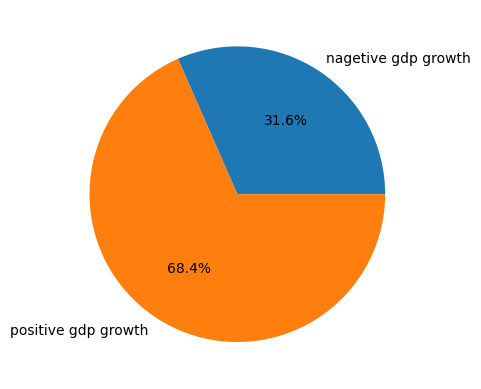

In [42]:
# 1. What percentage of the dataset shows negative GDP growth?
import matplotlib.pyplot as plt
import seaborn as sns

negative_gdp = df[df["GDP Growth (%)"] < 0]
positive_gdp = df[df["GDP Growth (%)"] > 0]

percentage_negative = (len(negative_gdp) / len(df)) * 100
percentage_postive = (len(positive_gdp)) / len(df) * 100

size = [percentage_negative,percentage_postive]
labels = ['nagetive gdp growth', 'positive gdp growth']

print(percentage_negative,"\n", percentage_postive)

plt.Figure(figsize=(8,6))
plt.pie(size,labels=labels,autopct="%.1f%%")
plt.show()



Correlation between Inflation and Interest Rate: 0.01


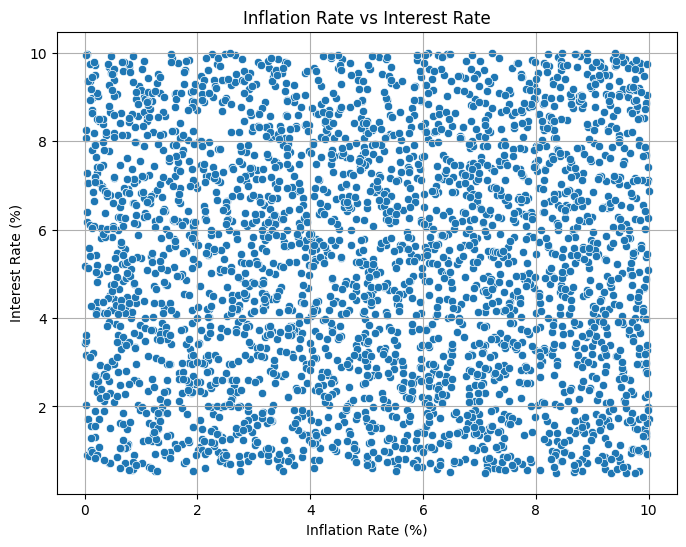

In [2]:
#2. Does high inflation correspond to higher interest rates?

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df has columns 'Inflation_Rate' and 'Interest_Rate'
correlation = df['Inflation Rate (%)'].corr(df['Interest Rate (%)'])
print("Correlation between Inflation and Interest Rate:", round(correlation,2))

plt.figure(figsize=(8,6))
sns.scatterplot(x='Inflation Rate (%)', y='Interest Rate (%)', data=df)
plt.title("Inflation Rate vs Interest Rate")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Interest Rate (%)")
plt.grid(True)
plt.show()



Correlation between Unemployment Rate and Consumer Spending: 0.02


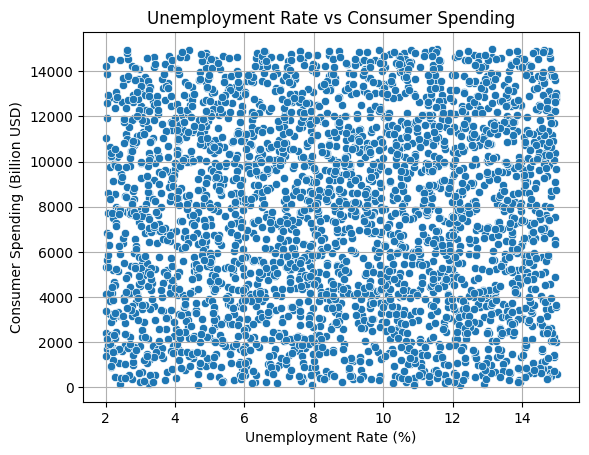

In [12]:
#3. Is there a relationship between unemployment and consumer spending?


correlation = df['Unemployment Rate (%)'].corr(df['Consumer Spending (Billion USD)'])
print("Correlation between Unemployment Rate and Consumer Spending:", round(correlation, 2))

plt.Figure(figsize=(8,6))
sns.scatterplot(x='Unemployment Rate (%)', y='Consumer Spending (Billion USD)', data=df)
plt.title("Unemployment Rate vs Consumer Spending")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Consumer Spending (Billion USD)")
plt.grid(True)
plt.show()



Correlation between Corporate Profits and Consumer Confidence Index: 0.02


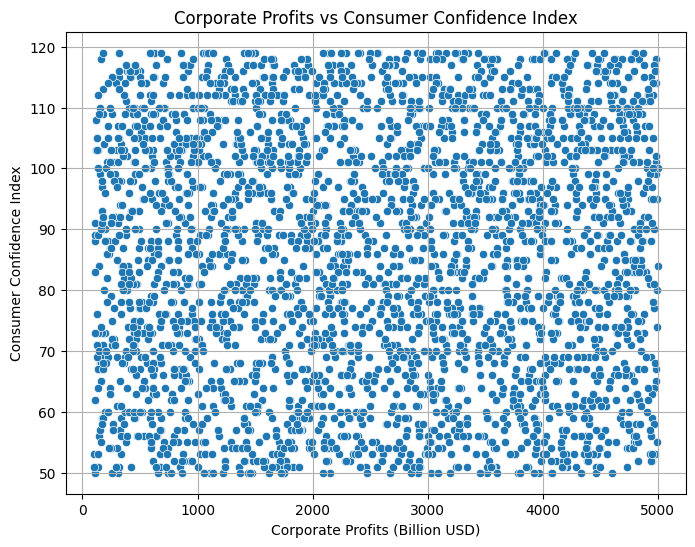

In [64]:
#4. Do higher corporate profits align with higher consumer confidence?

correlation = df['Corporate Profits (Billion USD)'].corr(df['Consumer Confidence Index'])
print("Correlation between Corporate Profits and Consumer Confidence Index:", round(correlation, 2))

plt.figure(figsize=(8,6))
sns.scatterplot(x='Corporate Profits (Billion USD)', y='Consumer Confidence Index', data=df)
plt.title("Corporate Profits vs Consumer Confidence Index")
plt.xlabel("Corporate Profits (Billion USD)")
plt.ylabel("Consumer Confidence Index")
plt.grid(True)
plt.show()

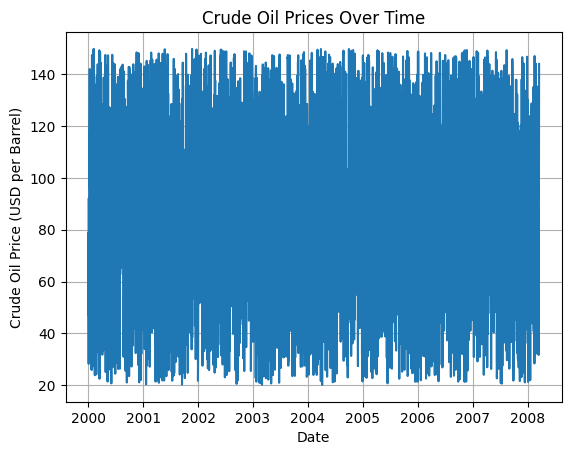

In [10]:
#5. What’s the trend of crude oil prices over time

df['Date'] = pd.to_datetime(df['Date'])

plt.Figure(figsize=(15,9))
sns.lineplot(x='Date', y='Crude Oil Price (USD per Barrel)', data=df)
plt.title("Crude Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Crude Oil Price (USD per Barrel)")
plt.grid(True)
plt.show()



Correlation between Gold Price and Stock Close Price: -0.01


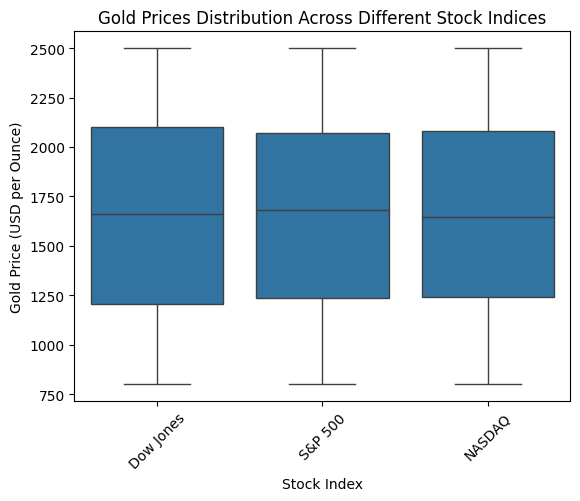

In [12]:
#6. Are gold prices inversely related to stock performance?

correlation = df['Gold Price (USD per Ounce)'].corr(df['Close Price'])
print("Correlation between Gold Price and Stock Close Price:", round(correlation, 2))

plt.Figure(figsize=(10,6))
sns.boxplot(x='Stock Index', y='Gold Price (USD per Ounce)', data=df)
plt.title("Gold Prices Distribution Across Different Stock Indices")
plt.xticks(rotation=45)
plt.show()


Correlation between Government Debt and Consumer Confidence: -0.04


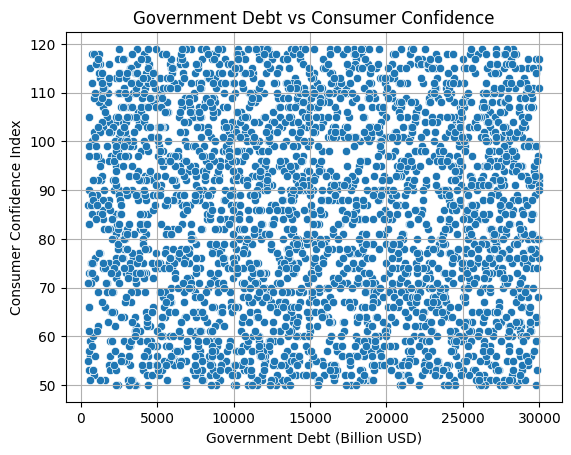

In [18]:
#7. Does government debt impact consumer confidence?

correlation = df['Government Debt (Billion USD)'].corr(df['Consumer Confidence Index'])
print("Correlation between Government Debt and Consumer Confidence:", round(correlation, 2))

plt.Figure(figsize=(10,6))
sns.scatterplot(x='Government Debt (Billion USD)', y='Consumer Confidence Index', data=df)
plt.title("Government Debt vs Consumer Confidence")
plt.grid(True)
plt.show()


Correlation between M&A Activity and Stock Index Closing Price: 0.0


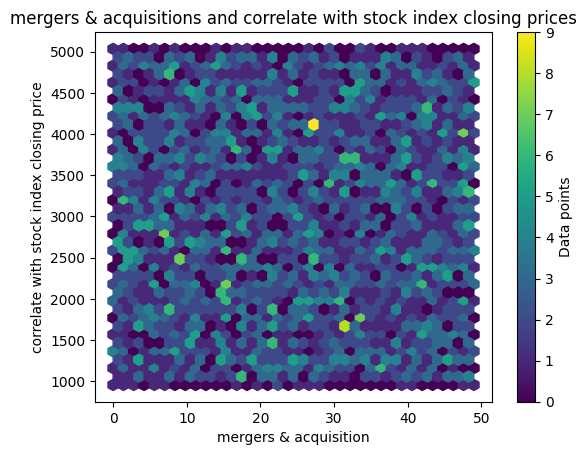

In [12]:
#8. How do mergers & acquisitions (M&A) activity correlate with stock index closing prices?

import matplotlib.pyplot as plt
import seaborn as sns


correlation = df['Mergers & Acquisitions Deals'].corr(df['Close Price'])
print("Correlation between M&A Activity and Stock Index Closing Price:", round(correlation, 2))

plt.Figure(figsize=(8,6))

plt.hexbin(df['Mergers & Acquisitions Deals'],df['Close Price'],gridsize=35)
plt.colorbar(label='Data points')
plt.title("mergers & acquisitions and correlate with stock index closing prices")
plt.xlabel("mergers & acquisition")
plt.ylabel("correlate with stock index closing price")
plt.show()


retail sales growth associated with GDP growth -0.01


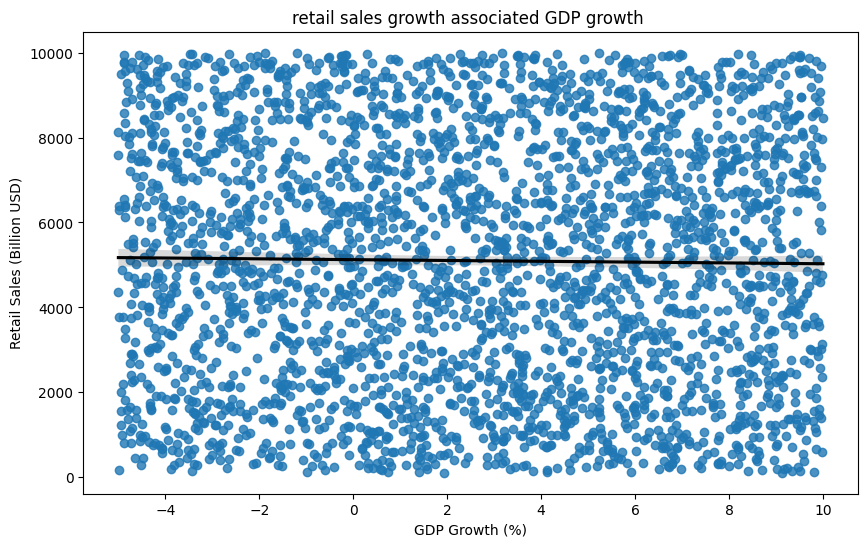

In [60]:
#9. Is retail sales growth associated with GDP growth?

correlation = df['Retail Sales (Billion USD)'].corr(df['GDP Growth (%)'])
print('retail sales growth associated with GDP growth',round(correlation,2))

plt.figure(figsize=(10,6))
sns.regplot(x='GDP Growth (%)',y='Retail Sales (Billion USD)',data=df,line_kws={'color':'black'})
plt.title('retail sales growth associated GDP growth ')
plt.show()

stock market performance linked to consumer spending 0.0


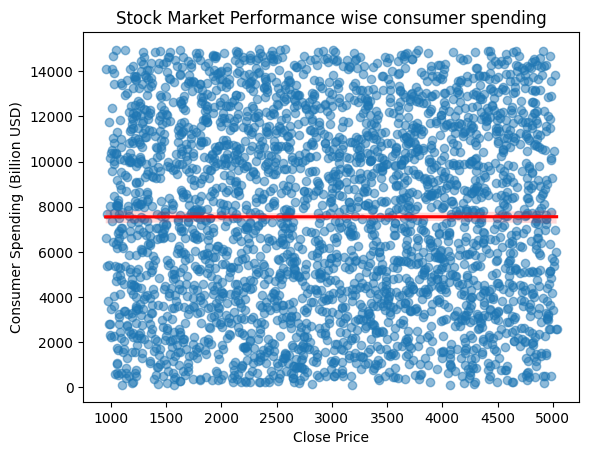

In [81]:
#10. Is stock market performance linked to consumer spending?

correlation = df['Close Price'].corr(df['Consumer Spending (Billion USD)'])
print('stock market performance linked to consumer spending', round(correlation,2))

plt.Figure(figsize=(10,6))
sns.regplot(x='Close Price',y='Consumer Spending (Billion USD)',data=df,line_kws={'color':'red'},scatter_kws={'alpha':0.5})
plt.title('Stock Market Performance wise consumer spending')
plt.show()

In [86]:
#11. Which stock index had the highest average closing price?

avg_closing_price = df.groupby('Stock Index')['Close Price'].mean()

print(avg_closing_price.sort_values(ascending=False))

top_index = avg_closing_price.idxmax()
top_value = avg_closing_price.max()

print(f'highest average closing index or value {top_index} ${round(top_value,2)}')



Stock Index
Dow Jones    3004.456447
NASDAQ       2985.905015
S&P 500      2955.286052
Name: Close Price, dtype: float64
highest average closing index or value Dow Jones $3004.46


relationship interest rate and unemployment 0.02


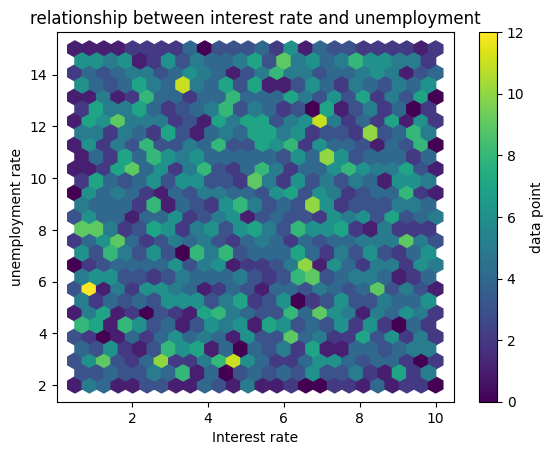

In [99]:
#12. What is the relationship between interest rate and unemployment?

import matplotlib.pyplot as plt
correlation = df['Interest Rate (%)'].corr(df['Unemployment Rate (%)'])
print('relationship interest rate and unemployment',round(correlation,2))

plt.Figure(figsize=(8,6))
plt.hexbin(df['Interest Rate (%)'],df['Unemployment Rate (%)'],gridsize=25)
plt.colorbar(label='data point')
plt.title('relationship between interest rate and unemployment')
plt.xlabel('Interest rate')
plt.ylabel('unemployment rate')
plt.show()

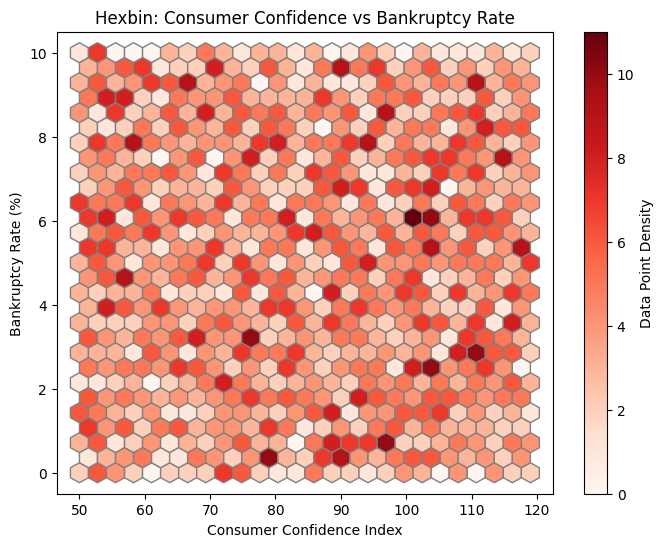

In [100]:
#13. Do lower consumer confidence values coincide with higher bankruptcy rates?

plt.figure(figsize=(8,6))
plt.hexbin(
    df['Consumer Confidence Index'],
    df['Bankruptcy Rate (%)'],
    gridsize=25,
    cmap='Reds',
    edgecolors='grey'
)
plt.colorbar(label='Data Point Density')
plt.title('Hexbin: Consumer Confidence vs Bankruptcy Rate')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Bankruptcy Rate (%)')
plt.show()

Close Price                              1.000000
Daily High                               0.999821
Daily Low                                0.999820
Open Price                               0.999688
Retail Sales (Billion USD)               0.049370
Bankruptcy Rate (%)                      0.029380
Venture Capital Funding (Billion USD)    0.021414
Interest Rate (%)                        0.020434
Trading Volume                           0.016283
Consumer Confidence Index                0.013482
Corporate Profits (Billion USD)          0.008797
Mergers & Acquisitions Deals             0.002637
Crude Oil Price (USD per Barrel)         0.002563
Consumer Spending (Billion USD)          0.000376
Unemployment Rate (%)                   -0.001907
Government Debt (Billion USD)           -0.007332
Inflation Rate (%)                      -0.007972
Real Estate Index                       -0.008639
GDP Growth (%)                          -0.012748
Gold Price (USD per Ounce)              -0.014544


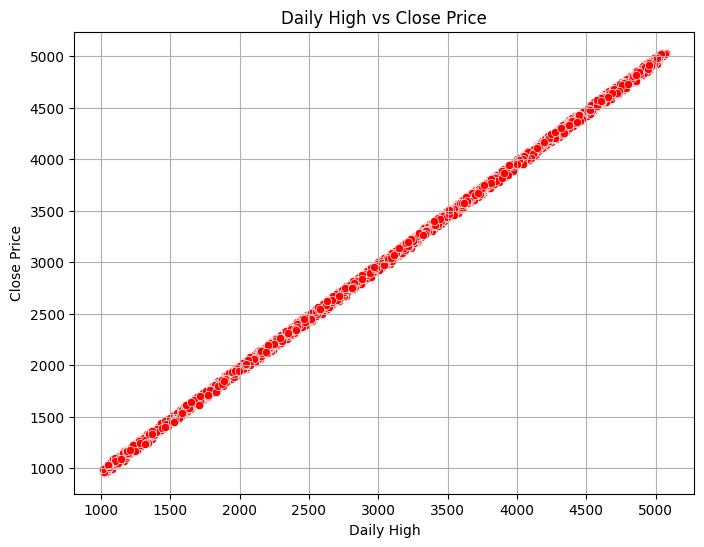

In [108]:
#14. Which indicator has the highest correlation with stock close price?

numeric_data = df.select_dtypes(include=['number']).columns

correlations = df[numeric_data].corr()['Close Price'].sort_values(ascending=False)
print(correlations)


highest_corr = correlations.drop('Close Price').idxmax()
highest_value = correlations.drop('Close Price').max()

print(f"Indicator with highest correlation to Close Price: {highest_corr} {round(highest_value,2)}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=df[highest_corr],y=df['Close Price'],color='red')
plt.title(f'{highest_corr} vs Close Price')
plt.xlabel(highest_corr)
plt.ylabel('Close Price')
plt.grid(True)
plt.show()



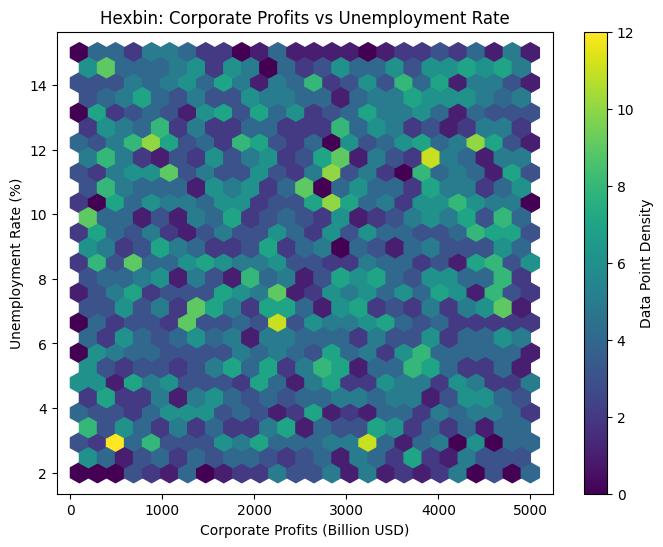

In [110]:
#15. Are unemployment rates lower when corporate profits are high?

plt.figure(figsize=(8,6))
plt.hexbin(df['Corporate Profits (Billion USD)'],df['Unemployment Rate (%)'],gridsize=25)
plt.colorbar(label='Data Point Density')
plt.title('Hexbin: Corporate Profits vs Unemployment Rate')
plt.xlabel('Corporate Profits (Billion USD)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

Assessment 2: Retail Sales Analysis

In [1]:
import pandas as pd

data2 = pd.read_csv("D:/python_practice/Retail Data.csv")

df2 = pd.DataFrame(data2)
print(df2.head(5))
#print(data2)

  Order No  Order Date           Customer Name  \
0   4293-1  02-09-2014        Vivek Sundaresam   
1   5001-1  24-10-2015          Shahid Hopkins   
2   5004-1  13-03-2014           Dennis Pardue   
3   5009-1  18-02-2013              Sean Wendt   
4   5010-1  13-09-2014  Christina Vanderzanden   

                          Address       City State   Customer Type  \
0  152 Bunnerong Road,Eastgardens     Sydney   NSW  Small Business   
1   438 Victoria Avenue,Chatswood     Sydney   NSW       Corporate   
2        412 Brunswick St,Fitzroy  Melbourne   VIC        Consumer   
3        145 Ramsay St,Haberfield     Sydney   NSW  Small Business   
4          188 Pitt Street,Sydney     Sydney   NSW  Small Business   

  Account Manager Order Priority  \
0    Tina Carlton       Critical   
1    Natasha Song         Medium   
2    Connor Betts  Not Specified   
3     Phoebe Gour       Critical   
4    Tina Carlton  Not Specified   

                                     Product Name  ... Cost P

In [2]:
#1. View the structure of the dataset (columns, types, missing values).

print(df2.columns)
print(df2.info())
print(df2.isnull().sum())

Index(['Order No', 'Order Date', 'Customer Name', 'Address', 'City', 'State',
       'Customer Type', 'Account Manager', 'Order Priority', 'Product Name',
       'Product Category', 'Product Container', 'Ship Mode', 'Ship Date',
       'Cost Price', 'Retail Price', 'Profit Margin', 'Order Quantity',
       'Sub Total', 'Discount %', 'Discount $', 'Order Total', 'Shipping Cost',
       'Total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order No           5000 non-null   object 
 1   Order Date         5000 non-null   object 
 2   Customer Name      5000 non-null   object 
 3   Address            4999 non-null   object 
 4   City               5000 non-null   object 
 5   State              5000 non-null   object 
 6   Customer Type      5000 non-null   object 
 7   Account Manager    5000 non-null   o

In [3]:
#2. What is the shape (rows, columns) of the dataset?

print(df2.shape)

(5000, 24)


In [4]:
#3. Are there any duplicate records?\

print(df2.duplicated().sum())

0


In [5]:
#4. Are there any missing or corrupted entries in Ship Date, Order Date, or numeric columns?

print("\n missing value of ship date \n", df2['Ship Date'].isnull().sum())

print(" missing value of order date\n", df2['Order Date'].isnull().sum())

# numeric columns

numeric_cols = df2.select_dtypes(include=['number']).columns
print("missing value numerical columns\n", df2[numeric_cols].isnull().sum())



 missing value of ship date 
 0
 missing value of order date
 0
missing value numerical columns
 Order Quantity    1
dtype: int64


In [6]:
#5. Convert Order Date and Ship Date to datetime.

if 'Order Date' in df2.columns:
    df2['Order Date'] = pd.to_datetime(df2['Order Date'], errors='coerce')


if 'Ship Date' in df2.columns:
    df2['Ship Date'] = pd.to_datetime(df2['Ship Date'],errors='coerce')


if 'Order Date' in df2.columns:
    print(df2[['Order Date']].head())


if 'Ship Date' in df2.columns:
    print(df2[['Ship Date']].head())


  Order Date
0 2014-02-09
1        NaT
2        NaT
3        NaT
4        NaT
   Ship Date
0 2014-04-09
1        NaT
2        NaT
3        NaT
4        NaT


In [7]:
#6. Check for future or inconsistent shipping dates.

df2['Order Date'] = pd.to_datetime(df2['Order Date'],errors='coerce')
df2['Ship Date'] = pd.to_datetime(df2['Ship Date'],errors='coerce')

# 1️⃣ Check for shipping dates in the future
future_ship_dates = df2[df2['Ship Date'] > pd.Timestamp.today()]

# 2️⃣ Check for inconsistent shipping dates (Ship Date before Order Date)
inconsistent_dates = df2[df2['Ship Date'] < df2['Order Date']]

# Display the results
print("🚚 Future Ship Dates:")
print(future_ship_dates[['Order Date', 'Ship Date']])

print("\n⚠️ Inconsistent Ship Dates (Ship Date before Order Date):")
print(inconsistent_dates[['Order Date', 'Ship Date']])


🚚 Future Ship Dates:
Empty DataFrame
Columns: [Order Date, Ship Date]
Index: []

⚠️ Inconsistent Ship Dates (Ship Date before Order Date):
     Order Date  Ship Date
204  2014-04-09 2014-03-09
764  2014-07-10 2014-02-10
765  2014-06-10 2014-02-10
863  2014-04-10 2014-02-10
1292 2014-12-02 2014-11-02
1322 2013-09-08 2013-03-09
1421 2015-04-12 2015-03-12
1513 2014-03-04 2014-02-04
1514 2014-03-04 2014-02-04
1594 2015-03-03 2015-01-03
1963 2014-09-08 2013-10-08
2057 2015-03-02 2015-02-03
2098 2015-03-02 2015-02-03
2316 2014-12-08 2014-10-08
2450 2015-03-02 2015-02-03
2761 2015-11-09 2015-02-09
2841 2015-03-02 2015-02-03
2926 2015-03-03 2015-01-03
3240 2016-08-11 2016-02-11
3325 2016-03-02 2016-02-03
3897 2016-03-11 2016-02-11
4168 2017-07-02 2017-04-02
4376 2015-03-05 2015-02-05
4685 2016-09-11 2016-03-11


In [8]:
#7. Convert price columns to numeric (remove $ and commas)

#price-related columns
price_columns = [
    'Cost Price', 'Retail Price', 'Profit Margin', 
    'Sub Total', 'Discount $', 'Order Total', 'Shipping Cost', 'Total'
]

# Remove $ and commas, then convert to numeric
for col in price_columns:
    if col in df2.columns:
        df2[col] = df2[col].replace('[\$,]', '', regex=True).astype(float)


print(df2[price_columns].head())
print("\nData types after conversion:\n", df2[price_columns].dtypes)

   Cost Price  Retail Price  Profit Margin  Sub Total  Discount $  \
0      156.50        300.97         144.47    4533.52      194.83   
1        0.24          1.26           1.02      45.20        0.00   
2       42.11         80.98          38.87     873.32       72.23   
3        5.33          8.60           3.27      73.52        4.35   
4        1.53          2.78           1.25     138.46        5.95   

   Order Total  Shipping Cost    Total  
0      4757.22           7.18  4291.55  
1        45.90           0.70    46.91  
2       837.57           7.18    82.58  
3       740.67           6.19   730.92  
4       123.77           1.34   125.97  

Data types after conversion:
 Cost Price       float64
Retail Price     float64
Profit Margin    float64
Sub Total        float64
Discount $       float64
Order Total      float64
Shipping Cost    float64
Total            float64
dtype: object


<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\syamu\AppData\Local\Temp\ipykernel_1744\1117292058.py:12: SyntaxWarning: invalid escape sequence '\$'
  df2[col] = df2[col].replace('[\$,]', '', regex=True).astype(float)


In [9]:
#8. What are the unique values in Customer Type and Order Priority?

print('unique customer type\n', df2['Customer Type'].unique())
print('unique order priority\n', df2['Order Priority'].unique())

unique customer type
 ['Small Business' 'Corporate' 'Consumer' 'Home Office']
unique order priority
 ['Critical' 'Medium' 'Not Specified' 'Low' 'High']


In [10]:
#9. What are the most common shipping modes?

if 'Ship Mode' in df2.columns:
    ship_count = df2['Ship Mode'].value_counts()
    print('most common shipping modes\n', ship_count)
else:
    print('does not have shiping mode column')    

most common shipping modes
 Ship Mode
Regular Air       4236
Express Air        647
Delivery Truck     117
Name: count, dtype: int64


In [11]:
#10. Which cities have the highest number of orders?

#print(df2['City'].mode())
print(df2['City'].value_counts())



City
Sydney       3584
Melbourne    1416
Name: count, dtype: int64


In [13]:
#11. What’s the range of order quantities and prices?

df2['Order Quantity'] = pd.to_numeric(df2['Order Quantity'], errors='coerce')

# Price columns (already converted to numeric in step 7)
price_columns = ['Cost Price', 'Retail Price', 'Profit Margin', 'Sub Total', 'Discount $', 'Order Total', 'Shipping Cost', 'Total']

# 1️⃣ Range of Order Quantity
order_qty_min = df2['Order Quantity'].min()
order_qty_max = df2['Order Quantity'].max()
print(f"Order Quantity range: {order_qty_min} to {order_qty_max}")

# 2️⃣ Range of price columns
for col in price_columns:
    if col in df2.columns:
        col_min = df2[col].min()
        col_max = df2[col].max()
        print(f"{col} range: {col_min} to {col_max}")

Order Quantity range: 1.0 to 50.0
Cost Price range: 0.24 to 377.99
Retail Price range: 1.14 to 599.99
Profit Margin range: 0.36 to 430.18
Sub Total range: 1.88 to 31699.82
Discount $ range: 0.0 to 6094.9
Order Total range: 1.71 to 28299.51
Shipping Cost range: 0.49 to 69.3
Total range: 2.85 to 26725.06


In [14]:
#12. Create a new column for shipping duration.

## Ensure both columns are in datetime format
df2['Order Date']=pd.to_datetime(df2['Order Date'] , errors='coerce')

df2['Ship Date'] = pd.to_datetime(df2['Ship Date'], errors='coerce')

# create nwe colomun

df2['Shipping duration'] = (df2['Ship Date'] - df2['Order Date']).dt.days


print(df2[['Shipping duration','Order Date','Ship Date']].head())



   Shipping duration Order Date  Ship Date
0               59.0 2014-02-09 2014-04-09
1                NaN        NaT        NaT
2                NaN        NaT        NaT
3                NaN        NaT        NaT
4                NaN        NaT        NaT


In [15]:
#13. Are there any orders with zero or negative total or quantity?

if 'Order Quantity' in df2.columns:
    df2['Order Quantity'] = pd.to_numeric(df2['Order Quantity'], errors='coerce')

if 'Total' in df2.columns:
    df2['Total'] = pd.to_numeric(df2['Total'], errors='coerce')


# nagetive quantity or total
nagetive_quantity = df2[df2['Order Quantity'] <= 0]
nagetive_total = df2[df2['Total'] <= 0]

print('orders with zero or negative total or quantity\n',nagetive_quantity,nagetive_total[['Order No', 'Order Quantity', 'Total']])

orders with zero or negative total or quantity
 Empty DataFrame
Columns: [Order No, Order Date, Customer Name, Address, City, State, Customer Type, Account Manager, Order Priority, Product Name, Product Category, Product Container, Ship Mode, Ship Date, Cost Price, Retail Price, Profit Margin, Order Quantity, Sub Total, Discount %, Discount $, Order Total, Shipping Cost, Total, Shipping duration]
Index: []

[0 rows x 25 columns] Empty DataFrame
Columns: [Order No, Order Quantity, Total]
Index: []


In [16]:
#14. Are all discount percentages matching discount dollar amounts?

df2['Sub Total'] = pd.to_numeric(df2['Sub Total'], errors='coerce')
df2['Discount $'] = pd.to_numeric(df2['Discount $'], errors='coerce')
df2['Discount %'] = pd.to_numeric(df2['Discount %'], errors='coerce')  # convert if not already numeric

# Calculate expected discount in dollars
df2['Expected Discount $'] = (df2['Sub Total'] * df2['Discount %']) / 100

# Check for mismatches (allowing small rounding tolerance)
mismatch = df2[abs(df2['Discount $'] - df2['Expected Discount $']) > 0.01]

print("Number of mismatched discount records:", len(mismatch))
print(mismatch[['Order No', 'Sub Total', 'Discount %', 'Discount $', 'Expected Discount $']].head())

Number of mismatched discount records: 0
Empty DataFrame
Columns: [Order No, Sub Total, Discount %, Discount $, Expected Discount $]
Index: []


In [17]:
#15. Check for mismatches in total calculation’ 

df2['Sub Total'] = pd.to_numeric(df2['Sub Total'], errors='coerce')
df2['Discount $'] = pd.to_numeric(df2['Discount $'], errors='coerce')
df2['Shipping Cost'] = pd.to_numeric(df2['Shipping Cost'], errors='coerce')
df2['Total'] = pd.to_numeric(df2['Total'], errors='coerce')

df2['Calculate total'] = df2['Sub Total'] - df2['Discount $'] + df2['Shipping Cost']

# Find mismatches (allowing small tolerance for rounding)
total_mismatch = df2[abs(df2['Total'] - df2['Calculate total']) > 0.01]


print("Number of orders with total mismatch:", len(total_mismatch))
print(total_mismatch[['Order No', 'Sub Total', 'Discount $', 'Shipping Cost', 'Total', 'Calculate total']].head())

Number of orders with total mismatch: 3960
  Order No  Sub Total  Discount $  Shipping Cost    Total  Calculate total
0   4293-1    4533.52      194.83           7.18  4291.55          4345.87
1   5001-1      45.20        0.00           0.70    46.91            45.90
2   5004-1     873.32       72.23           7.18    82.58           808.27
3   5009-1      73.52        4.35           6.19   730.92            75.36
4   5010-1     138.46        5.95           1.34   125.97           133.85


In [18]:

#16. Identify top 5 products by order quantity

df2['Order Quantity'] = pd.to_numeric(df2['Order Quantity'], errors='coerce')

product_quantity = df2.groupby('Product Name')['Order Quantity'].sum()

top_products = product_quantity.sort_values(ascending=False).head(5)

print('top 5 products by order quantity\n',top_products)

top 5 products by order quantity
 Product Name
Artisan 474 Labels                         3395.0
Smiths General Use 3-Ring Binders          3220.0
Artisan 479 Labels                         3039.0
Artisan 481 Labels                         2996.0
Apex Preferred Stainless Steel Scissors    2896.0
Name: Order Quantity, dtype: float64


In [19]:
#17. Which Account Manager handled the most revenue?

# Ensure Total is numeric
df2['Total'] = pd.to_numeric(df2['Total'], errors='coerce')

# Group by Account Manager and sum Total
manager_revenue = df2.groupby('Account Manager')['Total'].sum()

# Sort in descending order to find the highest revenue
top_manager = manager_revenue.sort_values(ascending=False).head(1)

print("Account Manager with highest revenue:\n", top_manager)

Account Manager with highest revenue:
 Account Manager
Connor Betts    671173.17
Name: Total, dtype: float64


In [20]:
#18. What is the average shipping cost by mode?

df2['Shipping Cost'] = pd.to_numeric(df2['Shipping Cost'],errors='coerce')

# average shipping cost by mode

avg_shipping = df2.groupby('Ship Mode')['Shipping Cost'].mean().sort_values(ascending=False)

print("average shipping cost by mode\n",avg_shipping)

average shipping cost by mode
 Ship Mode
Regular Air       5.503553
Delivery Truck    5.270085
Express Air       5.247311
Name: Shipping Cost, dtype: float64


In [21]:
#19. Find the most profitable product.
#20. Find the most profitable product.

if "Profit Margin" in df2.columns:
    df2['Profit Margin'] = pd.to_numeric(df2['Profit Margin'], errors='coerce')

product_profit = df2.groupby('Product Name')['Profit Margin'].sum()


# Find the most profitable product
most_profitable_product = product_profit.sort_values(ascending=False).head(1)

print(most_profitable_product)

Product Name
Cando PC940 Copier    17585.76
Name: Profit Margin, dtype: float64


Insightful Analysis Questions 

In [22]:
#1. What is the total revenue generated across all orders?

df2['Total'] = pd.to_numeric(df2['Total'],errors='coerce')

total_revenue = df2['Total'].sum()

print(total_revenue)

3731536.4000000004


In [23]:
#2. Which customer type generates more revenue?

df2['Total'] = pd.to_numeric(data2['Total'],errors='coerce')


customer_revenue = df2.groupby('Customer Type')['Total'].sum().sort_values(ascending=False)

print(customer_revenue)

Customer Type
Consumer          0.0
Corporate         0.0
Home Office       0.0
Small Business    0.0
Name: Total, dtype: float64


In [24]:
#3. How does order priority affect revenue?

df2['Total'] = pd.to_numeric(df2['Total'],errors='coerce')


customer_revenue = df2.groupby('Order Priority')['Total'].sum().sort_values(ascending=False)

print(customer_revenue)

Order Priority
Critical         0.0
High             0.0
Low              0.0
Medium           0.0
Not Specified    0.0
Name: Total, dtype: float64


In [25]:
#4. What is the average profit margin by product category?

df2['Profit Margin'] = pd.to_numeric(df2['Profit Margin'],errors='coerce')

if 'Product Category' in df2.columns:
    avg_profit_margin = df2.groupby('Product Category')['Profit Margin'].mean().sort_values(ascending=False)

    print('average profit margin by product category',avg_profit_margin)    

average profit margin by product category Product Category
Technology         20.423208
Office Supplies    17.682609
Furniture          12.701953
Name: Profit Margin, dtype: float64


In [26]:
#5. What is the most profitable product overall?

df2['Profit Margin'] = pd.to_numeric(df2['Profit Margin'], errors='coerce')

product_profit = df2.groupby('Product Name')['Profit Margin'].sum()

most_profitable_product =product_profit.sort_values(ascending=False).head(1)

print(most_profitable_product)



Product Name
Cando PC940 Copier    17585.76
Name: Profit Margin, dtype: float64


In [27]:
#6. How many days does it usually take to ship an order?

# Ensure Shipping Duration column exists
if 'Shipping Duration' not in df2.columns:
    # Create it if not already created
    df2['Order Date'] = pd.to_datetime(df2['Order Date'], errors='coerce')
    df2['Ship Date'] = pd.to_datetime(df2['Ship Date'], errors='coerce')
    df2['Shipping Duration'] = (df2['Ship Date'] - df2['Order Date']).dt.days

# Calculate average shipping duration
avg_shipping_days = df2['Shipping Duration'].mean()
print(f"Average number of days to ship an order: {avg_shipping_days:.2f} days")

Average number of days to ship an order: 50.47 days


In [28]:
#7. Do longer shipping times impact profit margins?

import matplotlib.pyplot as plt
import seaborn as sns

df2['Profit Margin'] = pd.to_numeric(df2['Profit Margin'],errors='coerce')
df2['Shipping Cost'] = pd.to_numeric(df2['Shipping Cost'],errors='coerce')

#plt.figure(figsize=(8,6))
#sns.scatterplot(x='Ship Mode',y='Profit Margin',data=df2)
#plt.show()

correlation = df2['Shipping Cost'].corr(df2['Profit Margin'])
print(f"Correlation between Shipping Duration and Profit Margin: {correlation:.2f}")


Correlation between Shipping Duration and Profit Margin: 0.67


In [29]:
#8. Which city brings in the highest revenue?

df2['Total'] = pd.to_numeric(df2['Total'],errors='coerce')

City_revenue = df2.groupby('City')['Total'].sum().sort_values(ascending=False)

top_city = City_revenue.head(1)

print(top_city)

City
Melbourne    0.0
Name: Total, dtype: float64


In [30]:
#9. Which account manager generated the most revenue?

df2['Total'] = pd.to_numeric(df2['Total'],errors='coerce')

Account_manger_reve = df2.groupby('Account Manager')['Total'].sum().sort_values(ascending=False)

most_revenue = Account_manger_reve.head(1)
print(most_revenue)

Account Manager
Aanya Zhang    0.0
Name: Total, dtype: float64


In [31]:
#10. Which shipping mode is most cost-effective (lowest avg. shipping)?

df2['Shipping Cost'] = pd.to_numeric(df2['Shipping Cost'],errors='coerce')

avg_shipping_cost = df2.groupby('Ship Mode')['Shipping Cost'].mean().sort_values()

most_cost_effective = avg_shipping_cost.head(1)

print(most_cost_effective)

import matplotlib.pyplot as plt
import seaborn as sns



Ship Mode
Express Air    5.247311
Name: Shipping Cost, dtype: float64


In [33]:
#11. Do higher discounts reduce profits?

import matplotlib.pyplot as plt
import seaborn as sns

# Convert Discount % to numeric safely
df2['Discount %'] = pd.to_numeric(df2['Discount %'].astype(str).str.replace('%',''), errors='coerce')

df2['Profit Margin'] = pd.to_numeric(df2['Profit Margin'], errors='coerce')


"""plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount %', y='Profit Margin', data=df2)
plt.title("Discount % vs Profit Margin")
plt.xlabel("Discount %")
plt.ylabel("Profit Margin ($)")
plt.show()
"""
# Correlation
correlation = df2['Discount %'].corr(df2['Profit Margin'])
print(f"Correlation between Discount % and Profit Margin: {correlation:.2f}")

Correlation between Discount % and Profit Margin: nan


higest number of order state State
NSW    3584
Name: count, dtype: int64
State
NSW    3584
VIC    1416
Name: count, dtype: int64


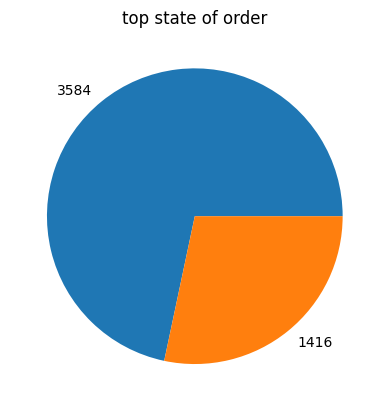

In [ ]:
#12. Which state has the highest number of orders?

state_order = df2['State'].value_counts()

highest_num_order_state = state_order.head(1)

print('higest number of order state',highest_num_order_state)

top_5_state = state_order.head(5)
print(top_5_state)

plt.Figure(figsize=(8,6))
plt.pie(top_5_state,labels=top_5_state)
plt.title('top state of order')
plt.show()


In [50]:
#13. What is the average discount % across all orders?

df2['Discount %'] = pd.to_numeric(df2['Discount %'].astype(str).str.replace('%',''), errors='coerce')


avg_discount = df2['Discount %'].mean()

print(f'average discount % across all orders{round(avg_discount,2)}')

average discount % across all ordersnan


In [51]:
#14. What is the average total spend per order?

df2['Total'] = pd.to_numeric(df2['Total'], errors='coerce')

avg_total = df2['Total'].mean()

print(f'average total spend per order {round(avg_total,2)}')


average total spend per order nan


Average profit margin by container type:
 Product Container
Small Box     19.668452
Small Pack    16.836970
Jumbo Drum    16.483419
Wrap Bag      16.407018
Medium Box    15.637523
Large Box     11.637730
Name: Profit Margin, dtype: float64


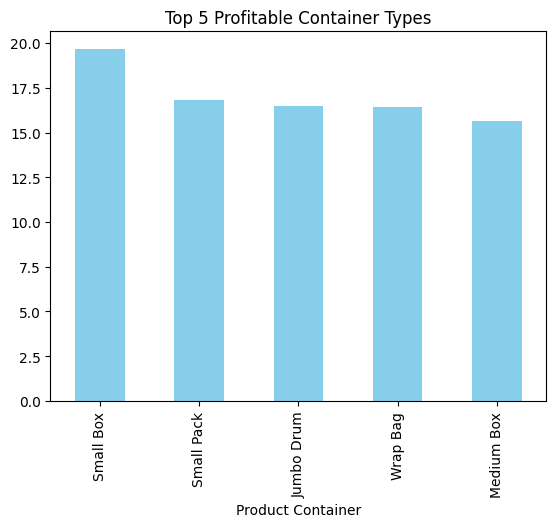

In [ ]:
#15. . Are certain containers (e.g., Small Box, Wrap Bag) more profitable?

df2['Profit Margin'] = pd.to_numeric(df2['Profit Margin'], errors='coerce')


if 'Product Container' in df2.columns:
    
    container_profit = df2.groupby('Product Container')['Profit Margin'].mean().sort_values(ascending=False)
    print("Average profit margin by container type:\n", container_profit)
    
    
    container_profit.head(5).plot(kind='bar', color='skyblue', title='Top 5 Profitable Container Types')
else:
    print("The dataset does not have a 'Product Container' column.")